In [1]:
from scipy.io import wavfile
import noisereduce as nr
import librosa
%matplotlib inline 

/Users/lorenzo/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
from IPython.display import Audio 
audio_file = './summer_2022_project/audio/8005.wav'
# load data
rate, data = wavfile.read(audio_file)
Audio(audio_file)

In [52]:
path = './summer_2022_project/'
# load data
rate, data = wavfile.read(audio_file)
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("reduced_noise.wav", rate, reduced_noise)

/Users/lorenzo/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/noisereduce/noisereduce.py:306: RuntimeWarning: invalid value encountered in true_divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth


In [39]:
reduced_noise

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [40]:
signal, sr = librosa.load(audio_file) # signal already normalized
signal

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [41]:
len(data)
len(data)/sr

0.9321995464852608

Text(0.5, 1.0, 'librosa (normalized amplitude)')

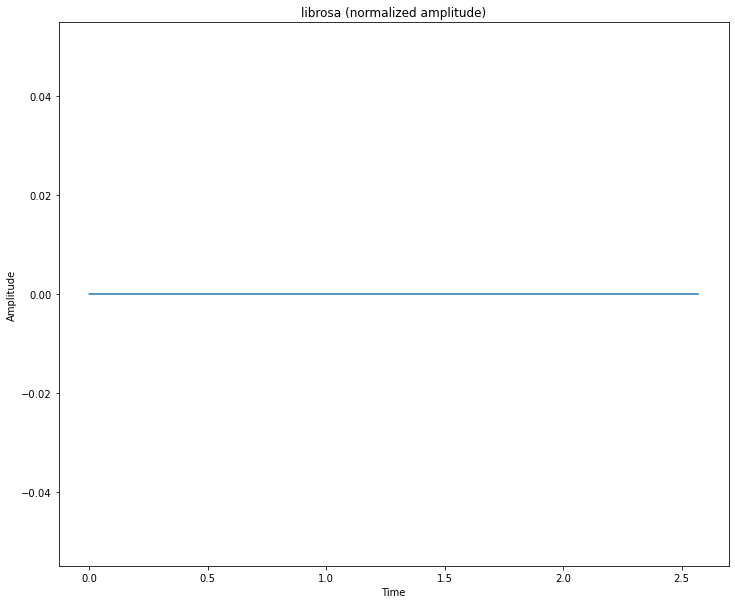

In [42]:
import matplotlib.pyplot as plt
import numpy as np
times = np.linspace(0, len(signal)/sr, len(signal))

plt.figure(figsize=(12,10))
plt.plot(times, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("librosa (normalized amplitude)")

Text(0.5, 1.0, 'scipy.wav (amplitude not normalized)')

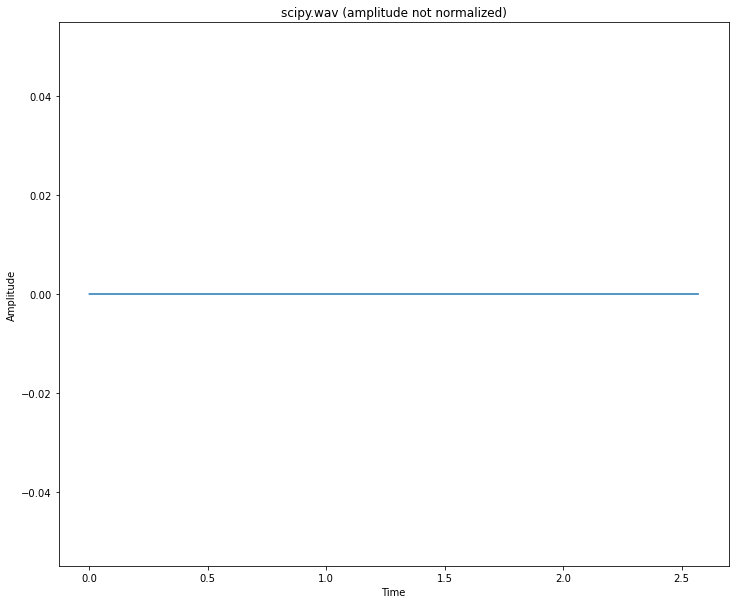

In [43]:
times = np.linspace(0, len(data)/rate, len(data))

plt.figure(figsize=(12,10))
plt.plot(times, data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('scipy.wav (amplitude not normalized)')

They are the same waveform. The librosa one is already normalized.

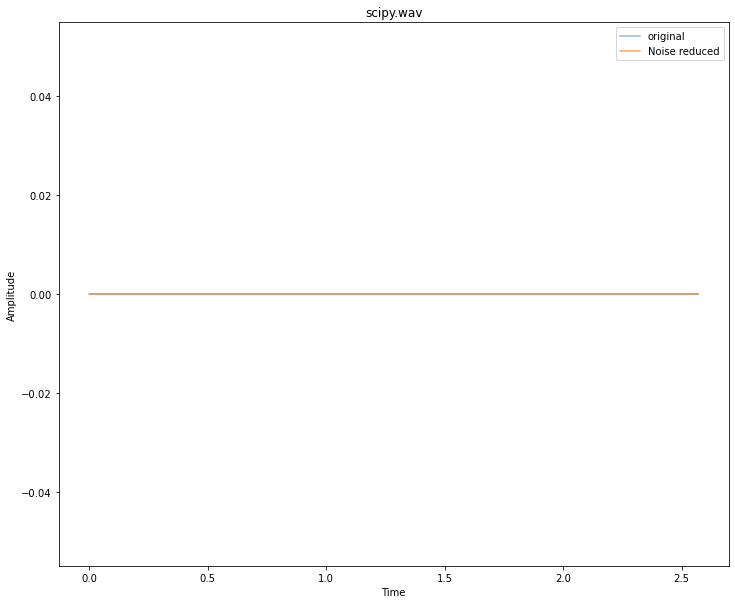

In [44]:
times = np.linspace(0, len(data)/rate, len(data))

plt.figure(figsize=(12,10))
plt.plot(times, data, label='original', alpha=.5)
plt.plot(times, reduced_noise, label='Noise reduced', alpha=.7)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('scipy.wav')
plt.legend()

/Users/lorenzo/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/noisereduce/noisereduce.py:306: RuntimeWarning: invalid value encountered in true_divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth


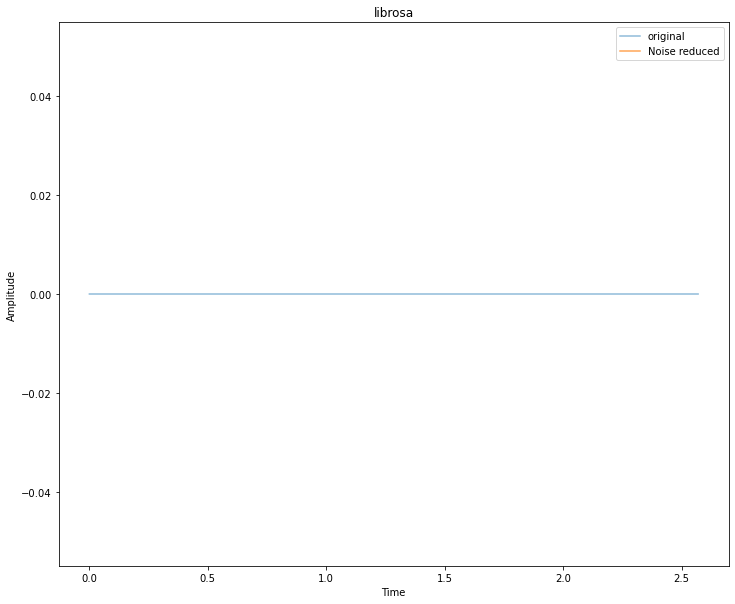

In [45]:
times = np.linspace(0, len(signal)/sr, len(signal))

plt.figure(figsize=(12,10))
plt.plot(times, signal, label='original', alpha=.5)
plt.plot(times, nr.reduce_noise(signal, sr), label='Noise reduced', alpha=.7)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('librosa')
plt.legend()

They are the same.

8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000


In [47]:
if signal.all == 0:
    print(True)

In [50]:
signal.sum()

0.0

In [57]:
a = nr.reduce_noise(signal, sr)

In [66]:
a

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [67]:
if np.sum(np.isnan(a)) != 0:
    idxs = np.argwhere(np.isnan(a)==True).reshape(-1,)
    for id in idxs:
        a[id] = 0.
a

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [65]:
np.argwhere(np.isnan(a)==True).reshape(-1,)

array([    0,     1,     2, ..., 56652, 56653, 56654])